<a href="https://colab.research.google.com/github/MainakRepositor/ML-Algorithms/blob/master/4_Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUPPORT VECTOR REGRESSION

<hr>

## Explanation:

### Support vector regression or SVR is a machine learning algorithm which automatically finds a good fit for a trend, not necessarily a linear one, but by using best expression which determines a proper relation. SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data. Truly speaking, SVR is the combination of all its prior regression algorithms. Practically it is used for classifaction based problems, but it is also quite helpful for solving regression use cases.

### In contrast to OLS, the objective function of SVR is to minimize the coefficients — more specifically, the l2-norm of the coefficient vector — not the squared error. The error term is instead handled in the constraints, where we set the absolute error less than or equal to a specified margin, called the maximum error, ϵ (epsilon). We can tune epsilon to gain the desired accuracy of our model. Our new objective function and constraints are as follows:

## Minimize:
<img src="https://miro.medium.com/max/285/1*6M8yyY7yC7xJX6nFN2SdCQ.png">

## Constraints:
<img src="https://miro.medium.com/max/316/1*gpN_ZxDuLgusn-O0fck13A.png">

## Working principle:
<img src="https://miro.medium.com/max/875/1*nrXHNqC_hqpyux7GUbtqAQ.png">

### SVR creates a confidence zone on both sides of the regression slope. Then it tries to fit all major points and forms a graph accordingly.
### Considering deviations from first prediction:
### We know that these deviations have the potential to exist, but we would still like to minimize them as much as possible. Thus, we can add these deviations to the objective function.

## Minimize:
<img src="https://miro.medium.com/max/498/1*6Pk3E2Mkg99jXbQTFla99Q.png">

## Constraint:
<img src="https://miro.medium.com/max/441/1*2BcaD3X72lAj7IezAOLJxg.png">

###  Considering both side deviations and thus forming a smoother plot

<img src="https://miro.medium.com/max/875/1*BunsGiCZCPAHzp33L2lCBA.png">

### This technique helps to fit most of the outliers except for the extremes. Thus the plotting becomes more realistic

## Building the ML model :

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print("All packages have been included successfully!")

All packages have been included successfully!


In [2]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Position_Salaries.csv'
df = pd.read_csv(url,error_bad_lines=False)
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
print(X)
print(y)
y = y.reshape(len(y),1)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [5]:
# Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [6]:
# Predicting a new result
sc_y.inverse_transform(regressor.predict(sc_X.transform([[12.5]])))

array([411842.2125027])

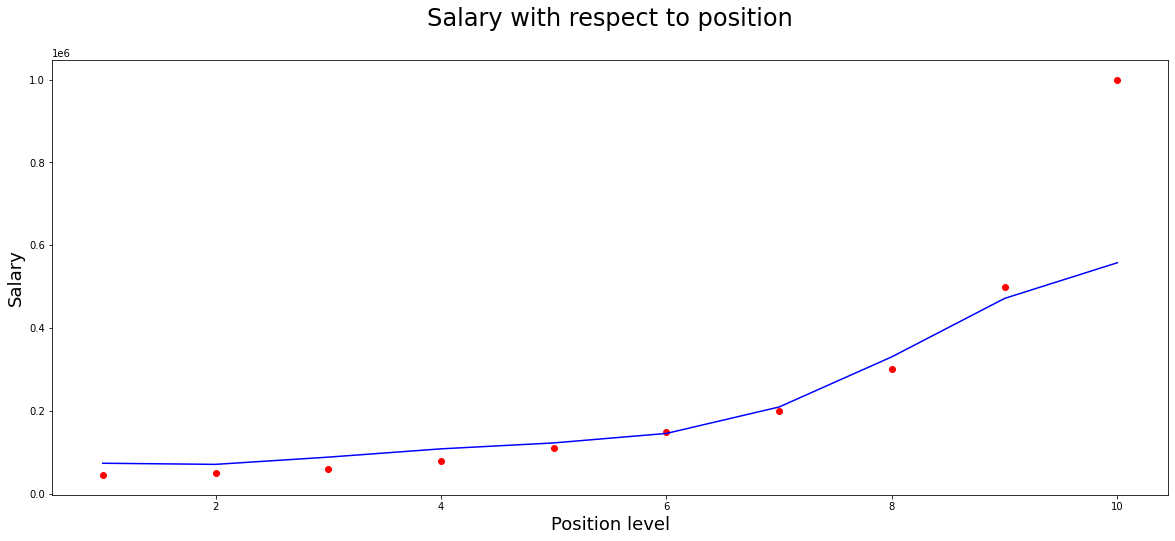

In [7]:
# Visualising the SVR results
plt.figure(figsize=(20,8))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Salary with respect to position\n',size=24)
plt.xlabel('Position level',size=18)
plt.ylabel('Salary',size=18)
plt.show()

## The plot has made a perfect trend analysis but the edges are pointed. So, let us smoothen them

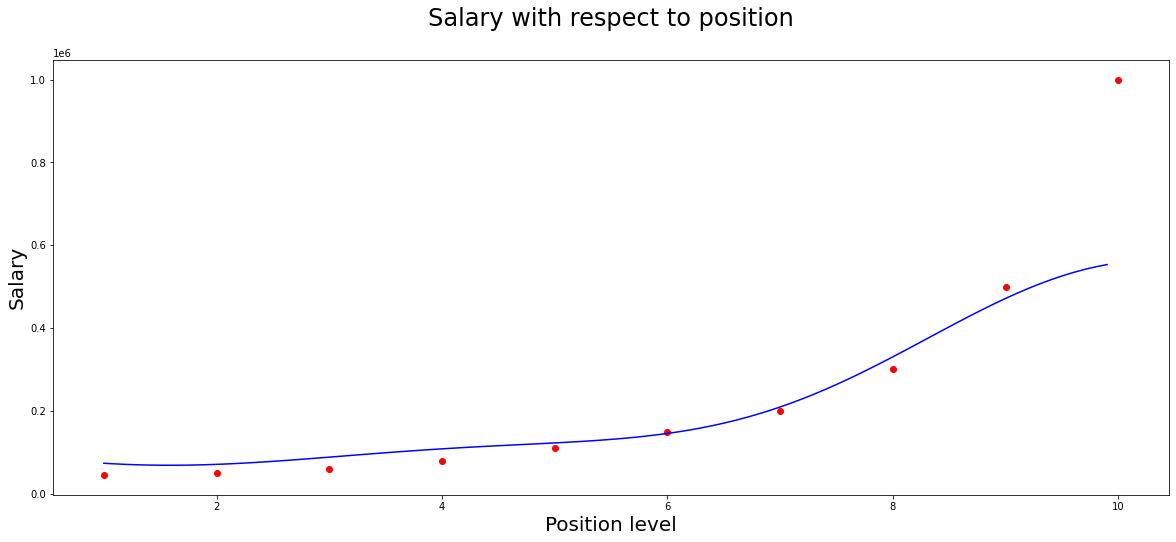

In [8]:
# Visualising the SVR results (for higher resolution and smoother curve)
plt.figure(figsize=(20,8))
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Salary with respect to position\n',size=24)
plt.xlabel('Position level',size=20)
plt.ylabel('Salary',size=20)
plt.show()

## Thus, SVR is correctly the "Jack of all trade".